link https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [36]:

import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings('ignore')

In [15]:
dataset_split = pd.read_csv("housing_clean.csv")
dataset_split.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880.0,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099.0,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467.0,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274.0,235.0,558,219,5.6431,352100,NEAR BAY
4,-122.25,37.85,52,1627.0,280.0,565,259,3.8462,352100,NEAR BAY


In [16]:
dataset_split.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069259,0.099773,0.055310,-0.015176,-0.046230
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.143926
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105940
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134121
total_bedrooms,0.069259,-0.066658,-0.318998,0.927253,1.000000,0.873909,0.974725,-0.007682,0.049458
population,0.099773,-0.108785,-0.296244,0.857126,0.873909,1.000000,0.907222,0.004834,-0.024706
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065851
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.687890
median_house_value,-0.046230,-0.143926,0.105940,0.134121,0.049458,-0.024706,0.065851,0.687890,1.000000


## **A. Supervised Learning**

digunakan pada label kategorikal

digunakan pada label kategorikal

Pisahkan fitur (X) dan label (y)

In [17]:

data = {
    'longitude': [random.uniform(-120, -118) for _ in range(100)],
    'latitude': [random.uniform(35, 38) for _ in range(100)],
    'housing_median_age': [random.randint(1, 50) for _ in range(100)],
    'total_rooms': [random.uniform(100, 5000) for _ in range(100)],
    'total_bedrooms': [random.uniform(20, 1000) for _ in range(100)],
    'population': [random.randint(10, 10000) for _ in range(100)],
    'households': [random.randint(2, 1000) for _ in range(100)],
    'median_income': [random.uniform(1, 10) for _ in range(100)],
    'median_house_value': [random.randint(50000, 2000000) for _ in range(100)]
}

# Buat DataFrame dari data
train_data = pd.DataFrame(data)

# Tampilkan beberapa baris pertama
print(train_data.head())


    longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
0 -119.885172  36.165491                  14  1787.312950      641.949882   
1 -119.305202  35.312652                  26   431.606432      447.065771   
2 -118.610967  37.792840                  39  1703.540768      725.155218   
3 -118.498610  36.269053                  12  3972.191099      850.831450   
4 -119.683335  37.880703                   4  4145.539538      651.088142   

   population  households  median_income  median_house_value  
0        4924         435       3.420378             1291306  
1        1974         169       6.849594             1111617  
2        9905         210       3.793181              201370  
3        9681         508       5.457978             1023669  
4        5504         691       8.860345              600389  


Pisahkan fitur (X) dan target (y)


In [18]:
X = train_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = train_data['median_house_value']

Bagi data menjadi data latihan dan data validasi


In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Preprocessing

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

Inisialisasi objek SVM

In [21]:
svm_classifier = SVC()

latih model SVM

In [22]:
svm_classifier.fit(X_train, y_train)

SVC()

Evaluasi model

In [23]:
accuracy = svm_classifier.score(X_val, y_val)
print(f'Akurasi Model: {accuracy}')

Akurasi Model: 0.0


Plotting menggunakan scatter dari Seaborn dan menampilkan titik titik support vector, lalu membuat garis decision boundary, meshgrid untuk evaluasi model, grafik decision boundary dan garis margin serta menambahkan label dan legenda

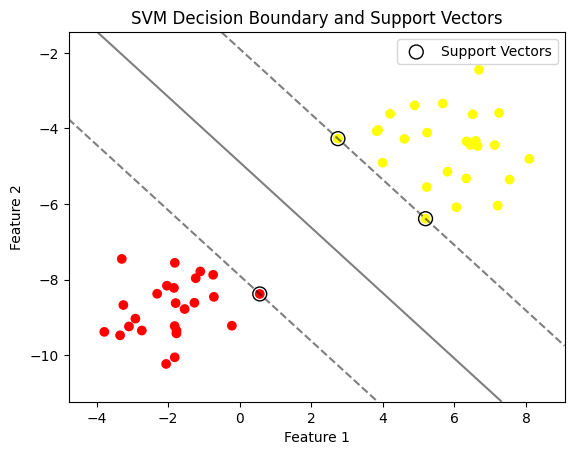

In [38]:

X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
svm_classifier = SVC(kernel='linear', C=1000)  # Linear kernel for simplicity
svm_classifier.fit(X, y)
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary and Support Vectors')
plt.show()


Data Transforming

In [24]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_norm = min_max_scaler.fit_transform(dataset_split[["longitude"]])
data_norm = pd.DataFrame(x_norm)
data_norm.head()

,0
0,0.211155
1,0.212151
2,0.210159
3,0.209163
4,0.209163


Standarisasi

In [25]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
x_standard = standard_scaler.fit_transform(
    dataset_split[["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households"]]
)
print("Rata2 sesudah di standarisasi : ", np.nanmean(x_standard))
print("Nilai sesudah di standarisasi : ", np.nanstd(x_standard))

Rata2 sesudah di standarisasi :  -1.3368904851123036e-15
Nilai sesudah di standarisasi :  1.0


In [26]:
data_standarisasi = pd.DataFrame(x_standard)
data_standarisasi

,0,1,2,3,4,5,6
0,-1.327835,1.052548,0.982143,-0.804819,-0.975224,-0.974429,-0.977033
1,-1.322844,1.043185,-0.607019,2.045890,1.355092,0.861439,1.669961
2,-1.332827,1.038503,1.856182,-0.535746,-0.829728,-0.820777,-0.843637
3,-1.337818,1.038503,1.856182,-0.624215,-0.722395,-0.766028,-0.733781
4,-1.337818,1.038503,1.856182,-0.462404,-0.615063,-0.759847,-0.629157
...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.390856,-0.512592,-0.443449
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.925135,-0.944405,-1.008420
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.126102,-0.369537,-0.174042
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.307375,-0.604429,-0.393753


Data Cleaning

In [27]:
from sklearn.impute import SimpleImputer
dataset_split

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880.0,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099.0,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467.0,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274.0,235.0,558,219,5.6431,352100,NEAR BAY
4,-122.25,37.85,52,1627.0,280.0,565,259,3.8462,352100,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665.0,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697.0,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254.0,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860.0,409.0,741,349,1.8672,84700,INLAND


Menangani Nilai NULL
Subtitusi Nilai NULL (Scikit)

In [28]:
imputer = SimpleImputer(strategy='mean')
print("Jumlah record yang memiliki nilai null: ")
print(dataset_split.isna().sum())

Jumlah record yang memiliki nilai null: 
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [29]:
dataset_split[dataset_split.isnull().any(axis = 1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [30]:
dataset_split["total_bedrooms"] = imputer.fit_transform(dataset_split[["total_bedrooms"]])
print("Jumlah record yang memiliki nilai null: ")
print(dataset_split.isna().sum())

Jumlah record yang memiliki nilai null: 
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [31]:
dataset_split[dataset_split.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


Data Encoding
One-Hot Encoding

In [32]:
from sklearn.preprocessing import OneHotEncoder
onehot = dataset_split["ocean_proximity"].value_counts().rename_axis("ocean_proximity").reset_index(name="count")
czip = zip(onehot["ocean_proximity"])
cname = [nama_kategori[0] for nama_kategori in list(czip)]
df = pd.DataFrame(dataset_split["ocean_proximity"])
df

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


Pembuatan Subset

In [15]:
x_scaled = standard_scaler.fit_transform(dataset_split[["longitude", "latitude"]])

Menentukan Jumlah Cluster (Elbow Method)

NameError: name 'x_scaled' is not defined

## **Unsupervised Learning**

K-Means

In [17]:
model_kmeans = KMeans(n_clusters = 5, random_state = 0)
model_kmeans.fit(x_scaled)

KMeans(n_clusters=5, random_state=0)

In [18]:
labels = model_kmeans.labels_
labels

array([1, 1, 1, ..., 4, 4, 4])

Menampilkan Centroid pada tiap Cluster


In [20]:
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

In [21]:
centroids = model_kmeans.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

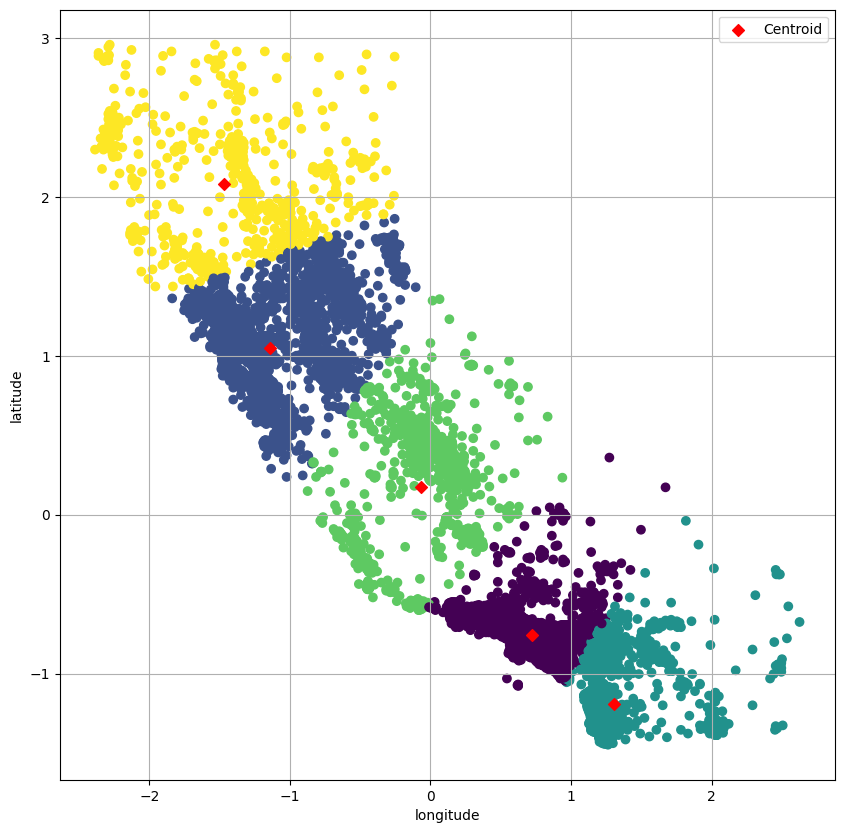

In [22]:
plt.figure(figsize = (10, 10))
plt.scatter(xs, ys, c = labels, alpha = 1)
plt.scatter(centroids_x, centroids_y, c = "red", marker= "D", label = "Centroid")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.grid(True)
plt.legend()
plt.show()